In [1]:
import time
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import sys
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation
import re
import gc

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/notebooks/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_output_files/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_result_files/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/annotation_files/"

In [4]:
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4].csv"
file_list = glob.glob(input_path + os.sep + '*' + os.sep + os.sep + '*' + os.sep + pattern, recursive=True)

In [5]:
dataframes_normalized_dict = {}

for file in file_list:
    
    plate_map_name = os.path.splitext(os.path.basename(file))[0]
    
    try:
        
        dataframe = pd.read_csv(file)
        row_count = dataframe.shape[0]
        
        print(f"INFO: {plate_map_name} has {row_count} rows")
        
        
    except Exception as e:
        
        print(f"Error reading file {plate_map_name}: {e}")   
        
    features = CBE.get_feature_vector(dataframe)
    metadata_dataframe = set(dataframe.columns) - set(features)
        
    ### convert sets to list
    features_list = list(features)
    metadata_list = list(metadata_dataframe)
        
    number_features = len(features_list)
        
    print(f"INFO: {plate_map_name} has {number_features} features")
        
    # TODO: Adjust to future pycytominer version
    # TODO: Try out other normalization methods
    normalizer = "mad_robustize" 
    
    dataframe_normalized = pycytominer.normalize(
        
        profiles = dataframe,
        features = features,
        meta_features = metadata_dataframe,
        method = normalizer, ### Method to normalize the data
        samples = "Metadata_RoughID == 'DMSO'" # normalization performed on neg. controls
    )
    
    print(f"INFO: Normalized with {normalizer}")
    
    filename_norm_data = plate_map_name + "_" + normalizer + ".csv"
    
    path_norm_data = os.path.dirname(file)
    file_path_norm_data = os.path.join(path_norm_data, filename_norm_data)
    
    dataframe_normalized.to_csv(file_path_norm_data, index=False)
    
    print(f"INFO: Saved {filename_norm_data}")
    
    # TODO: collect them in dictionary for further processing. 
    # TODO: Based on key Date_Source_Plate_replicate
    dict_key = dataframe_normalized['Metadata_imaging_date'][0] + "_" + dataframe_normalized['Metadata_source'][0] + "_" + dataframe_normalized['Metadata_plate_map_name'][0]

    dataframes_normalized_dict[dict_key] = dataframe_normalized

INFO: C1231_R1 has 384 rows
INFO: C1231_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1231_R1_mad_robustize.csv
INFO: C1241_R1 has 384 rows
INFO: C1241_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1241_R1_mad_robustize.csv
INFO: C1230_R3 has 384 rows
INFO: C1230_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1230_R3_mad_robustize.csv
INFO: C1230_R4 has 384 rows
INFO: C1230_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1230_R4_mad_robustize.csv
INFO: C1231_R4 has 384 rows
INFO: C1231_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1231_R4_mad_robustize.csv
INFO: C1241_R2 has 384 rows
INFO: C1241_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1241_R2_mad_robustize.csv
INFO: C1230_R2 has 384 rows
INFO: C1230_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1230_R2_mad_robustize.csv
INFO: C1231_R2 has 384 rows
INFO: C1231_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1231_R2_mad_robustize.csv
INFO: C1241_R3 has 384 rows
INFO: C1241_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1241_R3_mad_robustize.csv
INFO: C1230_R1 has 384 rows
INFO: C1230_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1230_R1_mad_robustize.csv
INFO: C1231_R3 has 384 rows
INFO: C1231_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1231_R3_mad_robustize.csv
INFO: C1236_R4 has 384 rows
INFO: C1236_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1236_R4_mad_robustize.csv
INFO: C1237_R4 has 384 rows
INFO: C1237_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1237_R4_mad_robustize.csv
INFO: C1184_R1 has 384 rows
INFO: C1184_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1184_R1_mad_robustize.csv
INFO: C1166_R2 has 384 rows
INFO: C1166_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1166_R2_mad_robustize.csv
INFO: C1162_R4 has 384 rows
INFO: C1162_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1162_R4_mad_robustize.csv
INFO: C1175_R1 has 384 rows
INFO: C1175_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1175_R1_mad_robustize.csv
INFO: C1160_R2 has 384 rows
INFO: C1160_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1160_R2_mad_robustize.csv
INFO: C1160_R3 has 384 rows
INFO: C1160_R3 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R3_mad_robustize.csv
INFO: C1165_R2 has 384 rows
INFO: C1165_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1165_R2_mad_robustize.csv
INFO: C1171_R2 has 384 rows
INFO: C1171_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1171_R2_mad_robustize.csv
INFO: C1188_R1 has 384 rows
INFO: C1188_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1188_R1_mad_robustize.csv
INFO: C1176_R1 has 384 rows
INFO: C1176_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1176_R1_mad_robustize.csv
INFO: C1183_R1 has 384 rows
INFO: C1183_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1183_R1_mad_robustize.csv
INFO: C1189_R1 has 384 rows
INFO: C1189_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1189_R1_mad_robustize.csv
INFO: C1192_R1 has 384 rows
INFO: C1192_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1192_R1_mad_robustize.csv
INFO: C1167_R1 has 384 rows
INFO: C1167_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1167_R1_mad_robustize.csv
INFO: C1166_R1 has 384 rows
INFO: C1166_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1166_R1_mad_robustize.csv
INFO: C1158_R4 has 384 rows
INFO: C1158_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1158_R4_mad_robustize.csv
INFO: C1158_R2 has 384 rows
INFO: C1158_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1158_R2_mad_robustize.csv
INFO: C1191_R1 has 384 rows
INFO: C1191_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1191_R1_mad_robustize.csv
INFO: C1170_R1 has 384 rows
INFO: C1170_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1170_R1_mad_robustize.csv
INFO: C1157_R4 has 384 rows
INFO: C1157_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1157_R4_mad_robustize.csv
INFO: C1187_R1 has 384 rows
INFO: C1187_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1187_R1_mad_robustize.csv
INFO: C1162_R2 has 384 rows
INFO: C1162_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1162_R2_mad_robustize.csv
INFO: C1162_R1 has 384 rows
INFO: C1162_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1162_R1_mad_robustize.csv
INFO: C1185_R1 has 384 rows
INFO: C1185_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1185_R1_mad_robustize.csv
INFO: C1162_R3 has 384 rows
INFO: C1162_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1162_R3_mad_robustize.csv
INFO: C1169_R1 has 384 rows
INFO: C1169_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1169_R1_mad_robustize.csv
INFO: C1179_R1 has 384 rows
INFO: C1179_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1179_R1_mad_robustize.csv
INFO: C1173_R2 has 384 rows
INFO: C1173_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1173_R2_mad_robustize.csv
INFO: C1172_R2 has 383 rows
INFO: C1172_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1172_R2_mad_robustize.csv
INFO: C1171_R1 has 384 rows
INFO: C1171_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1171_R1_mad_robustize.csv
INFO: C1159_R2 has 384 rows
INFO: C1159_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1159_R2_mad_robustize.csv
INFO: C1160_R1 has 384 rows
INFO: C1160_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R1_mad_robustize.csv
INFO: C1157_R3 has 384 rows
INFO: C1157_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1157_R3_mad_robustize.csv
INFO: C1180_R1 has 384 rows
INFO: C1180_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1180_R1_mad_robustize.csv
INFO: C1186_R1 has 384 rows
INFO: C1186_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1186_R1_mad_robustize.csv
INFO: C1172_R1 has 384 rows
INFO: C1172_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1172_R1_mad_robustize.csv
INFO: C1178_R1 has 384 rows
INFO: C1178_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1178_R1_mad_robustize.csv
INFO: C1181_R1 has 384 rows
INFO: C1181_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1181_R1_mad_robustize.csv
INFO: C1173_R1 has 384 rows
INFO: C1173_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1173_R1_mad_robustize.csv
INFO: C1160_R4 has 384 rows
INFO: C1160_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1160_R4_mad_robustize.csv
INFO: C1182_R1 has 384 rows
INFO: C1182_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1182_R1_mad_robustize.csv
INFO: C1164_R1 has 384 rows
INFO: C1164_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1164_R1_mad_robustize.csv
INFO: C1157_R1 has 384 rows
INFO: C1157_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1157_R1_mad_robustize.csv
INFO: C1169_R2 has 384 rows
INFO: C1169_R2 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1169_R2_mad_robustize.csv
INFO: C1159_R3 has 384 rows
INFO: C1159_R3 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1159_R3_mad_robustize.csv
INFO: C1163_R1 has 384 rows
INFO: C1163_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1163_R1_mad_robustize.csv
INFO: C1168_R1 has 384 rows
INFO: C1168_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1168_R1_mad_robustize.csv
INFO: C1174_R1 has 384 rows
INFO: C1174_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1174_R1_mad_robustize.csv
INFO: C1165_R3 has 384 rows
INFO: C1165_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1165_R3_mad_robustize.csv
INFO: C1167_R2 has 384 rows
INFO: C1167_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1167_R2_mad_robustize.csv
INFO: C1084_R4 has 384 rows
INFO: C1084_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1084_R4_mad_robustize.csv
INFO: C1084_R2 has 384 rows
INFO: C1084_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1084_R2_mad_robustize.csv
INFO: C1092_R1 has 384 rows
INFO: C1092_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1092_R1_mad_robustize.csv
INFO: C1086_R4 has 384 rows
INFO: C1086_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1086_R4_mad_robustize.csv
INFO: C1093_R4 has 384 rows
INFO: C1093_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1093_R4_mad_robustize.csv
INFO: C1089_R1 has 384 rows
INFO: C1089_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1089_R1_mad_robustize.csv
INFO: C1087_R2 has 384 rows
INFO: C1087_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1087_R2_mad_robustize.csv
INFO: C1085_R2 has 384 rows
INFO: C1085_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1085_R2_mad_robustize.csv
INFO: C1088_R2 has 384 rows
INFO: C1088_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1088_R2_mad_robustize.csv
INFO: C1085_R1 has 384 rows
INFO: C1085_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1085_R1_mad_robustize.csv
INFO: C1099_R1 has 378 rows
INFO: C1099_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1099_R1_mad_robustize.csv
INFO: C1103_R1 has 382 rows
INFO: C1103_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1103_R1_mad_robustize.csv
INFO: C1102_R1 has 378 rows
INFO: C1102_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1102_R1_mad_robustize.csv
INFO: C1093_R1 has 384 rows
INFO: C1093_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1093_R1_mad_robustize.csv
INFO: C1094_R1 has 380 rows
INFO: C1094_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1094_R1_mad_robustize.csv
INFO: C1095_R1 has 375 rows
INFO: C1095_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1095_R1_mad_robustize.csv
INFO: C1088_R4 has 384 rows
INFO: C1088_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1088_R4_mad_robustize.csv
INFO: C1092_R2 has 375 rows
INFO: C1092_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1092_R2_mad_robustize.csv
INFO: C1086_R2 has 384 rows
INFO: C1086_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1086_R2_mad_robustize.csv
INFO: C1091_R1 has 384 rows
INFO: C1091_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1091_R1_mad_robustize.csv
INFO: C1098_R1 has 370 rows
INFO: C1098_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1098_R1_mad_robustize.csv
INFO: C1100_R1 has 371 rows
INFO: C1100_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1100_R1_mad_robustize.csv
INFO: C1087_R4 has 384 rows
INFO: C1087_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1087_R4_mad_robustize.csv
INFO: C1101_R1 has 376 rows
INFO: C1101_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1101_R1_mad_robustize.csv
INFO: C1090_R4 has 384 rows
INFO: C1090_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1090_R4_mad_robustize.csv
INFO: C1091_R4 has 384 rows
INFO: C1091_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1091_R4_mad_robustize.csv
INFO: C1091_R2 has 383 rows
INFO: C1091_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1091_R2_mad_robustize.csv
INFO: C1096_R1 has 370 rows
INFO: C1096_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1096_R1_mad_robustize.csv
INFO: C1085_R4 has 384 rows
INFO: C1085_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1085_R4_mad_robustize.csv
INFO: C1093_R2 has 384 rows
INFO: C1093_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1093_R2_mad_robustize.csv
INFO: C1086_R1 has 384 rows
INFO: C1086_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1086_R1_mad_robustize.csv
INFO: C1087_R1 has 384 rows
INFO: C1087_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1087_R1_mad_robustize.csv
INFO: C1089_R2 has 384 rows
INFO: C1089_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1089_R2_mad_robustize.csv
INFO: C1089_R4 has 383 rows
INFO: C1089_R4 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1089_R4_mad_robustize.csv
INFO: C1092_R4 has 383 rows
INFO: C1092_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1092_R4_mad_robustize.csv
INFO: C1088_R1 has 384 rows
INFO: C1088_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1088_R1_mad_robustize.csv
INFO: C1090_R1 has 384 rows
INFO: C1090_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1090_R1_mad_robustize.csv
INFO: C1084_R1 has 384 rows
INFO: C1084_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1084_R1_mad_robustize.csv
INFO: C1097_R1 has 375 rows
INFO: C1097_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1097_R1_mad_robustize.csv
INFO: C1090_R2 has 383 rows
INFO: C1090_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1090_R2_mad_robustize.csv


In [20]:
def get_pos_control_correlation(input_dataframe, pos_ctrl_string):
    
    pos_ctrl_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == pos_ctrl_string]

    corr_pos_ctrl = None

    if (len(pos_ctrl_dataframe) == 2 ):

        well_1_features = pos_ctrl_dataframe.iloc[0][features].values
        well_2_features = pos_ctrl_dataframe.iloc[1][features].values
    
        corr = np.corrcoef(well_1_features.astype(float), well_2_features.astype(float))
        np.fill_diagonal(corr, np.nan)

        corr_pos_ctrl = np.nanmedian(corr)

    return corr_pos_ctrl

In [21]:
def get_median_pos_ctrl_correlation(input_dataframe):

    tetrandrine_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == 'Tetrandrine']
    tetrandrine_median_features = tetrandrine_dataframe[features].median(axis=0)

    nocodazole_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == 'Nocodazole']
    nocodazole_median_features = nocodazole_dataframe[features].median(axis=0)
    
    corr = np.corrcoef(tetrandrine_median_features.astype(float), nocodazole_median_features.astype(float))
    np.fill_diagonal(corr, np.nan)

    return np.nanmedian(corr)

In [22]:
def pad_numbers(value):
    match = re.match(r"([A-Z])(\d+)", value)
    if match:
        letter = match.group(1)
        number = match.group(2).zfill(2)  # Pad number to 2 digits
        return f"{letter}{number}"
    return value

# Within plate comparison

In [23]:
imaging_date = []
plate_name = []
replicate_number = []
plate_map_name = []
plate_code_list = []
user = []
source = []
picklist_name = []
noco_corr = []
tet_corr = []
pos_ctrl_corr = []
test_corr_noco_all = {}
test_corr_tet_all = {}
test_corr_pos_ctrl_all = {}

for plate_code in dataframes_normalized_dict:
    
    layout_dictionary = {'R1':'Picklist_Replicate1.csv',
                     'R2':'Picklist_Replicate2.csv',
                     'R3':'Picklist_Replicate3.csv',
                     'R4':'Picklist_Replicate4.csv'
                    }

    
    print(f"Testing {plate_code}")
    
    dataframe_for_QC1 = dataframes_normalized_dict[plate_code]
    
    print(f"Original layout is {dataframe_for_QC1['Metadata_replicate_number'][0]}")
    
    features = CBE.get_feature_vector(dataframe_for_QC1)
    metadata_dataframe = set(dataframe_for_QC1.columns) - set(features)
        
    ### convert sets to list
    features_list = list(features)
    metadata_list = list(metadata_dataframe)
    
    imaging_date.append(dataframe_for_QC1['Metadata_imaging_date'][0])
    plate_name.append(dataframe_for_QC1['Metadata_plate_name'][0])
    replicate_number.append(dataframe_for_QC1['Metadata_replicate_number'][0])
    plate_map_name.append(dataframe_for_QC1['Metadata_plate_map_name'][0])
    plate_code_list.append(plate_code)
    user.append(dataframe_for_QC1['Metadata_user'][0])
    source.append(dataframe_for_QC1['Metadata_source'][0])
    picklist_name.append(dataframe_for_QC1['Metadata_picklist_name'][0])
    noco_corr.append(get_pos_control_correlation(dataframe_for_QC1, 'Nocodazole'))
    tet_corr.append(get_pos_control_correlation(dataframe_for_QC1, 'Tetrandrine'))
    pos_ctrl_corr.append(get_median_pos_ctrl_correlation(dataframe_for_QC1))
    
    test_corr_noco = {}
    test_corr_tet = {}
    test_corr_pos_ctrl = {}
    
    # test through all layouts including original 
    for layout_number in layout_dictionary:
    
        # create copy from orginal QC dataframe
        dataframe_for_QC_test = dataframe_for_QC1.copy()

        # remove columns associated with original well info
        dataframe_for_QC_test = dataframe_for_QC_test.drop(['Metadata_RoughID', 'Metadata_picklist_name', 'Metadata_Well'], axis=1)

        # add ID to make sure we know and it does not contaminate our data
        dataframe_for_QC_test['Metadata_picklist_name'] = 'test_layout_' + layout_number

        plate_layout_path = os.path.join(annotation_dir, 'plate_layout', layout_dictionary[layout_number])
        plate_layout = pd.read_csv(plate_layout_path)

        # Issue in the plate layout the well numbers are not padded
        plate_layout['Destination Well'] = plate_layout['Destination Well'].apply(pad_numbers)
        plate_layout['Source Well'] = plate_layout['Source Well'].apply(pad_numbers)

        # rename the columns accordingly
        plate_layout = plate_layout.rename(columns={"Destination Well": "Metadata_Well_randomized"})
        plate_layout = plate_layout.rename(columns={"Source Well": "Metadata_Well"})
         
        dataframe_for_QC_test = pd.merge(dataframe_for_QC_test, plate_layout, on='Metadata_Well_randomized')

        # get info for pos. and neg. controls
        controls_layout_path = os.path.join(annotation_dir, "pos_neg_ctrl.csv")
        controls_layout = pd.read_csv(controls_layout_path)

        # Issue in the plate layout the well numbers are not padded
        controls_layout['Metadata_Well'] = controls_layout['Metadata_Well'].apply(pad_numbers)

        dataframe_for_QC_test = pd.merge(dataframe_for_QC_test, controls_layout, on='Metadata_Well')
        
        test_corr_noco['Layout_test_noco_' + layout_number] = get_pos_control_correlation(dataframe_for_QC_test, 'Nocodazole')
        test_corr_tet['Layout_test_tet_' + layout_number] = get_pos_control_correlation(dataframe_for_QC_test, 'Tetrandrine')
        test_corr_pos_ctrl['Layout_test_pos_ctrl_' + layout_number] = get_median_pos_ctrl_correlation(dataframe_for_QC_test)
    
        del dataframe_for_QC_test
        gc.collect()
        
        
    test_corr_noco_all[plate_code] = test_corr_noco
    test_corr_tet_all[plate_code] = test_corr_tet
    test_corr_pos_ctrl_all[plate_code] = test_corr_pos_ctrl
    

quality_control_1 = {
    'Metadata_imaging_date': imaging_date,
    'Metadata_plate_name': plate_name,
    'Metadata_replicate_number': replicate_number,
    'Metadata_plate_map_name': plate_map_name,
    'Metadata_plate_code': plate_code_list,
    'Metadata_user': user,
    'Metadata_source':source,
    'Metadata_noco_corr': noco_corr,
    'Metadata_tet_corr': tet_corr,
    'Metadata_pos_ctrl_corr': pos_ctrl_corr,
}

Testing 2024-06-05_IMTM_C1231_R1
Original layout is R1
Testing 2024-06-27_IMTM_C1241_R1
Original layout is R1
Testing 2024-06-03_IMTM_C1230_R3
Original layout is R3
Testing 2024-06-03_IMTM_C1230_R4
Original layout is R4
Testing 2024-06-06_IMTM_C1231_R4
Original layout is R4
Testing 2024-06-27_IMTM_C1241_R2
Original layout is R2
Testing 2024-05-30_IMTM_C1230_R2
Original layout is R2
Testing 2024-06-05_IMTM_C1231_R2
Original layout is R2
Testing 2024-06-27_IMTM_C1241_R3
Original layout is R3
Testing 2024-05-30_IMTM_C1230_R1
Original layout is R1
Testing 2024-06-05_IMTM_C1231_R3
Original layout is R3
Testing 2024-06-17_IMTM_C1236_R4
Original layout is R4
Testing 2024-06-21_IMTM_C1237_R4
Original layout is R4
Testing 2024-06-28_USC_C1184_R1
Original layout is R1
Testing 2024-07-03_USC_C1166_R2
Original layout is R2
Testing 2024-06-19_USC_C1162_R4
Original layout is R4
Testing 2024-06-27_USC_C1175_R1
Original layout is R1
Testing 2024-06-15_USC_C1160_R2
Original layout is R2
Testing 2024-06

In [24]:
quality_control_1_df = pd.DataFrame(quality_control_1)

quality_control_1_noco_test_corr = pd.DataFrame.from_dict(test_corr_noco_all, orient='index')
quality_control_1_noco_test_corr = quality_control_1_noco_test_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

quality_control_1_tet_test_corr = pd.DataFrame.from_dict(test_corr_tet_all, orient='index')
quality_control_1_tet_test_corr = quality_control_1_tet_test_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

quality_control_1_pos_ctrl_corr = pd.DataFrame.from_dict(test_corr_pos_ctrl_all, orient='index')
quality_control_1_pos_ctrl_corr = quality_control_1_pos_ctrl_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

test_correlations = pd.merge(quality_control_1_noco_test_corr, quality_control_1_tet_test_corr, on='Metadata_plate_code')
test_correlations = pd.merge(test_correlations, quality_control_1_pos_ctrl_corr, on='Metadata_plate_code')

In [25]:
quality_control_1_df = pd.DataFrame(quality_control_1) 

file_path_quality_control_1 = os.path.join(output_path, 'quality_control_1.csv')
quality_control_1_df .to_csv(file_path_quality_control_1, index=False)

file_path_test_correlations = os.path.join(output_path, 'test_correlations.csv')
test_correlations.to_csv(file_path_test_correlations, index=False)

In [26]:
# TODO: Determine a baseline

In [27]:
quality_control_1_melt = pd.melt(quality_control_1_df, 
        id_vars = ["Metadata_imaging_date",
                   "Metadata_plate_name",
                   "Metadata_replicate_number",
                   "Metadata_plate_map_name",
                   "Metadata_plate_code",
                   "Metadata_user",
                   "Metadata_source"],
        value_vars = ["Metadata_noco_corr", 
                      "Metadata_tet_corr", 
                      "Metadata_pos_ctrl_corr"],
        var_name="Tested pair",
        value_name="Correlation")

In [28]:
FMP_quality_control_1 = quality_control_1_melt.loc[quality_control_1_melt['Metadata_source'] == 'FMP']
USC_quality_control_1 = quality_control_1_melt.loc[quality_control_1_melt['Metadata_source'] == 'USC']
IMTM_quality_control_1 = quality_control_1_melt.loc[quality_control_1_melt['Metadata_source'] == 'IMTM']

In [29]:
# Cell Number output for FMP
fmp_figure_path = os.path.join(output_path + os.sep + 'FMP')  

try:
    os.mkdir(fmp_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


In [30]:
# Cell Number output for FMP
usc_figure_path = os.path.join(output_path + os.sep + 'USC')  

try:
    os.mkdir(usc_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


In [31]:
# Cell Number output for FMP
IMTM_figure_path = os.path.join(output_path + os.sep + 'IMTM')  

try:
    os.mkdir(IMTM_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


<Figure size 1008x504 with 0 Axes>

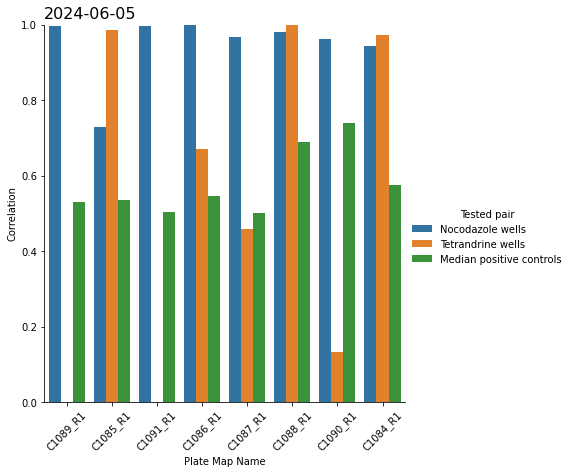

<Figure size 1008x504 with 0 Axes>

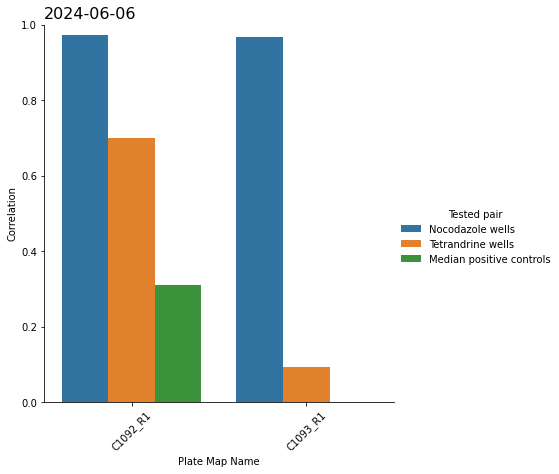

<Figure size 1008x504 with 0 Axes>

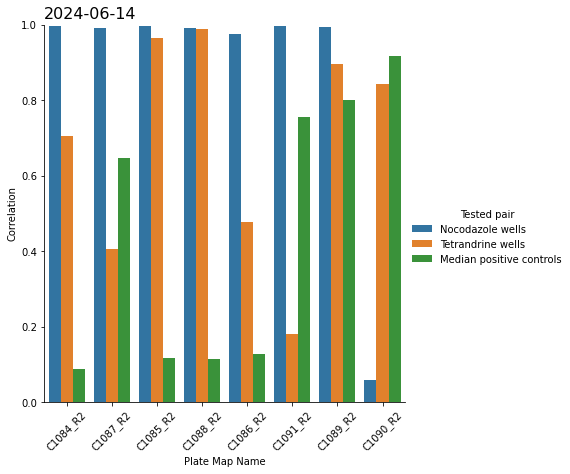

<Figure size 1008x504 with 0 Axes>

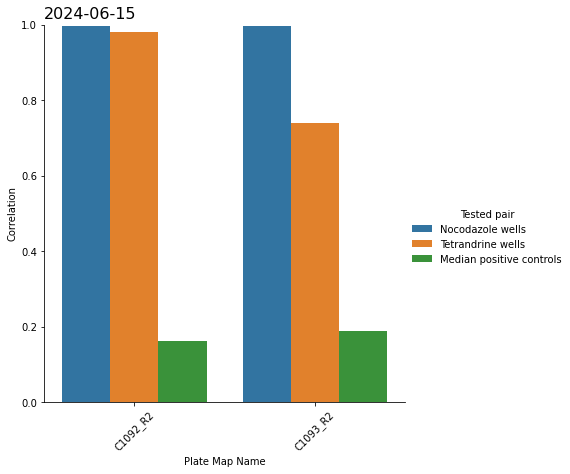

<Figure size 1008x504 with 0 Axes>

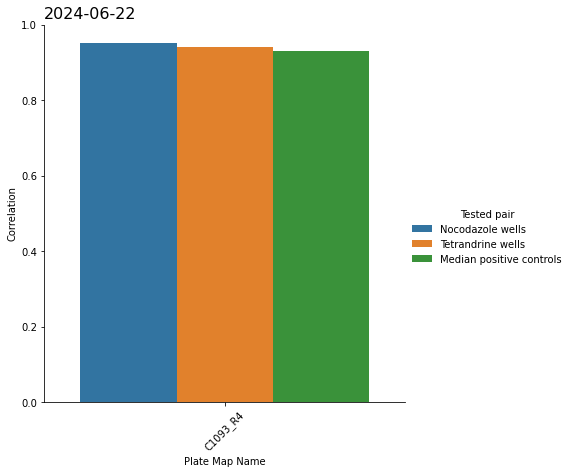

<Figure size 1008x504 with 0 Axes>

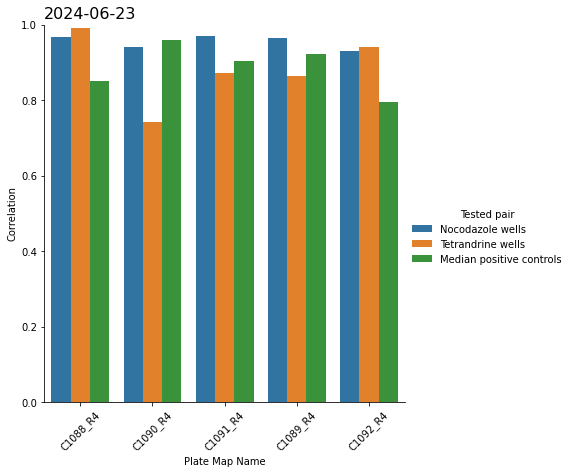

<Figure size 1008x504 with 0 Axes>

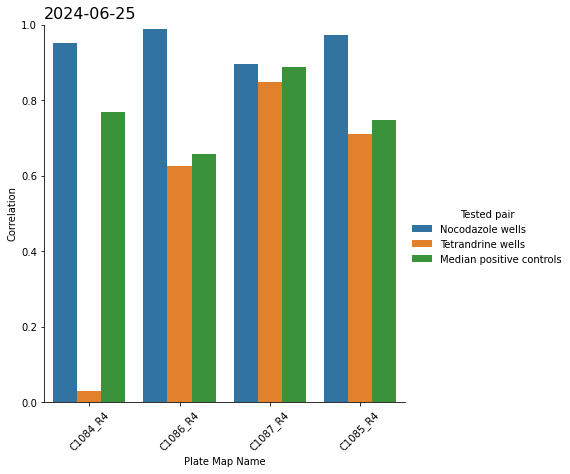

<Figure size 1008x504 with 0 Axes>

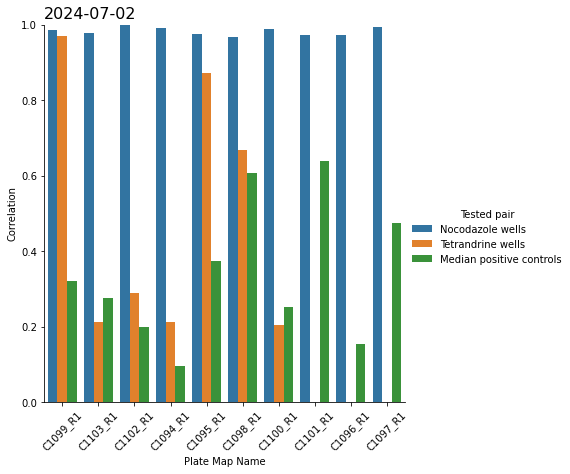

In [32]:
# TODO: Refactor as function
# TODO: Update visualizations
# TODO: Order plates by imaging time
# TODO: Batches are separated if imaging time is past midnight > need heuristic there
imaging_date_list = FMP_quality_control_1["Metadata_imaging_date"].unique()
imaging_date_list.sort()

for date in imaging_date_list:
    
    FMP_qc = FMP_quality_control_1.loc[FMP_quality_control_1["Metadata_imaging_date"] == date]
    
    FMP_qc = FMP_qc.replace(to_replace="Metadata_noco_corr", value="Nocodazole wells")
    FMP_qc = FMP_qc.replace(to_replace="Metadata_tet_corr", value="Tetrandrine wells")
    FMP_qc = FMP_qc.replace(to_replace="Metadata_pos_ctrl_corr", value="Median positive controls")
    
    plt.figure(figsize=(14, 7))
    
    sns.catplot(FMP_qc,
                       kind="bar",
                       x="Metadata_plate_map_name",
                       y="Correlation",
                       hue="Tested pair",
                       height=6,
                       aspect=1)
    
    plt.title(date, loc = 'left',fontsize= 16)
    plt.xlabel('Plate Map Name')
    plt.ylabel('Correlation')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    
    plt.savefig(fmp_figure_path + os.sep + date + '_' + 'FMP_IntraPlate.pdf', format='pdf', bbox_inches = "tight")
    

<ipython-input-33-c8f75f3c2e25>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 7))


<Figure size 1008x504 with 0 Axes>

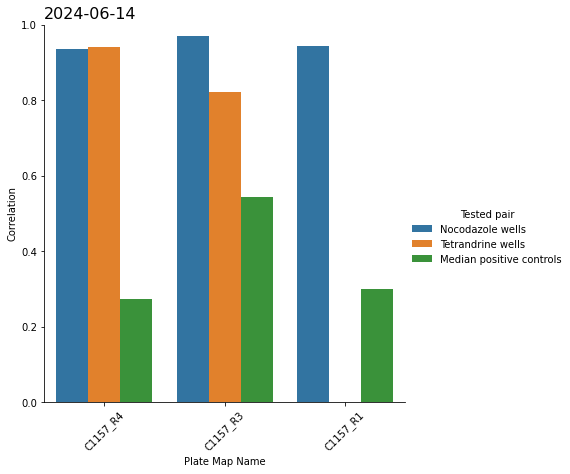

<Figure size 1008x504 with 0 Axes>

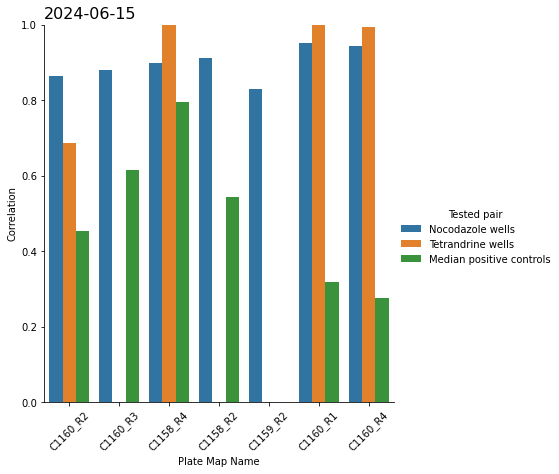

<Figure size 1008x504 with 0 Axes>

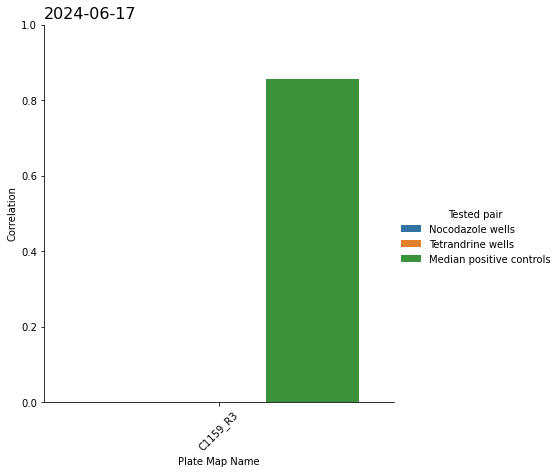

<Figure size 1008x504 with 0 Axes>

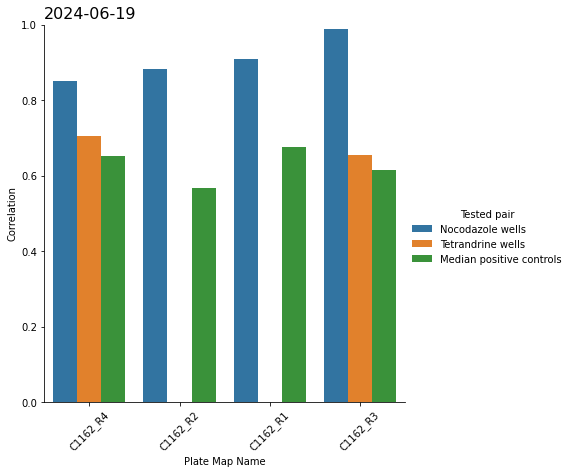

<Figure size 1008x504 with 0 Axes>

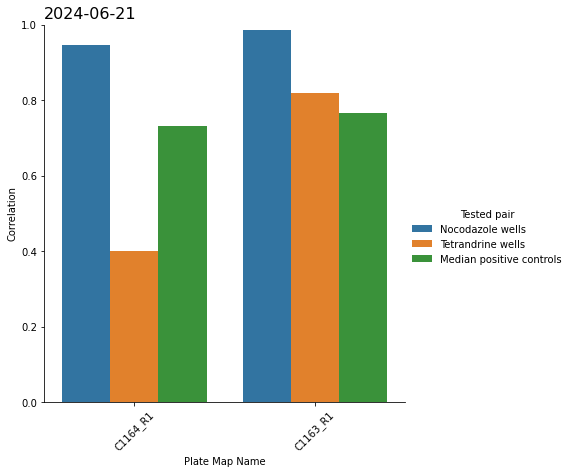

<Figure size 1008x504 with 0 Axes>

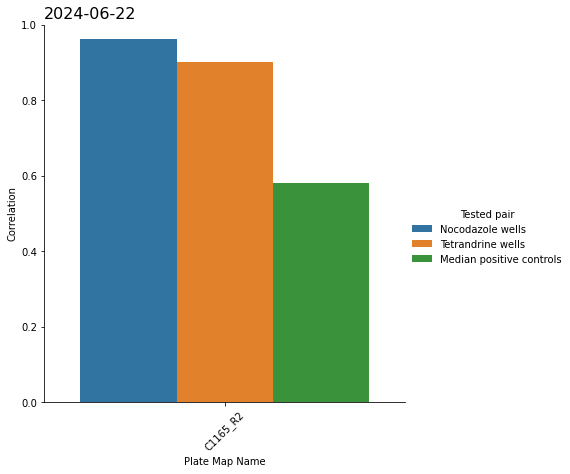

<Figure size 1008x504 with 0 Axes>

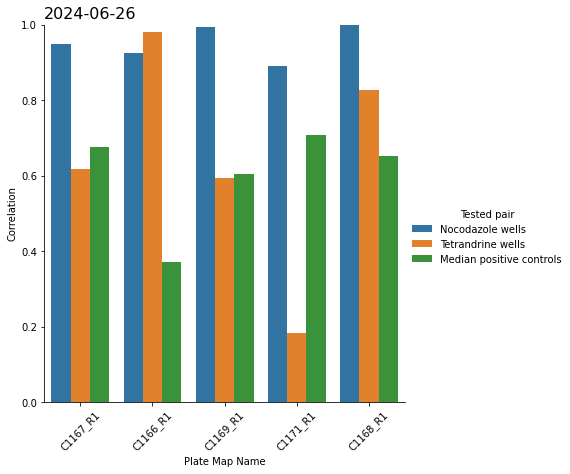

<Figure size 1008x504 with 0 Axes>

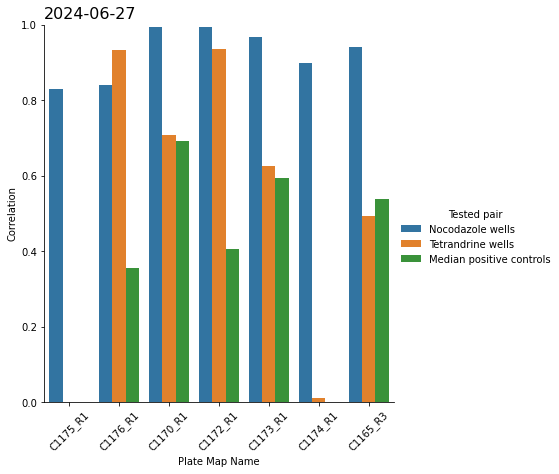

<Figure size 1008x504 with 0 Axes>

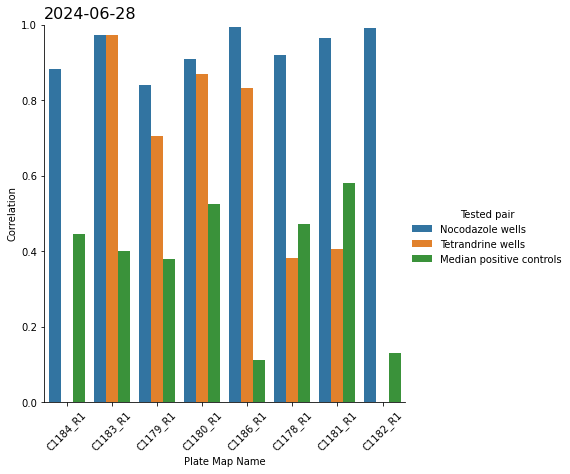

<Figure size 1008x504 with 0 Axes>

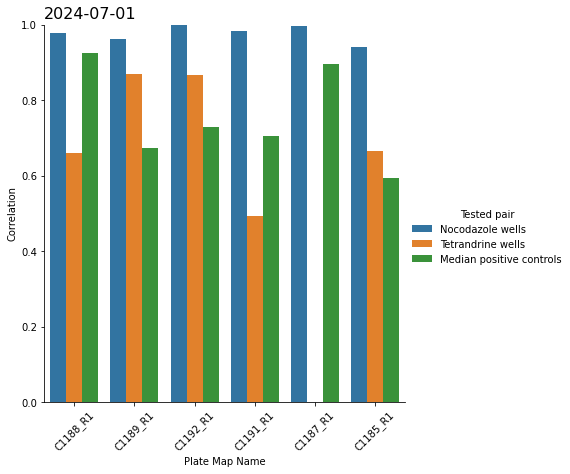

<Figure size 1008x504 with 0 Axes>

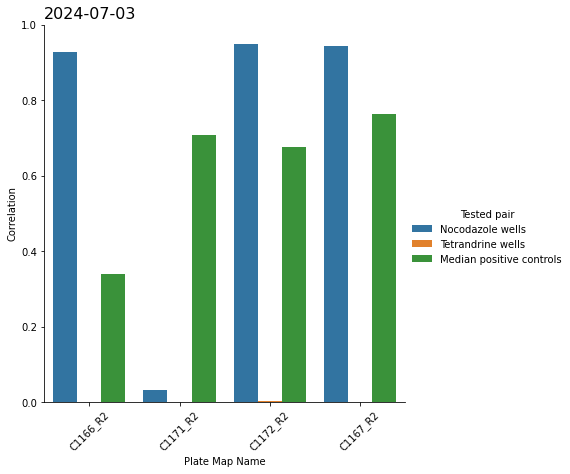

<Figure size 1008x504 with 0 Axes>

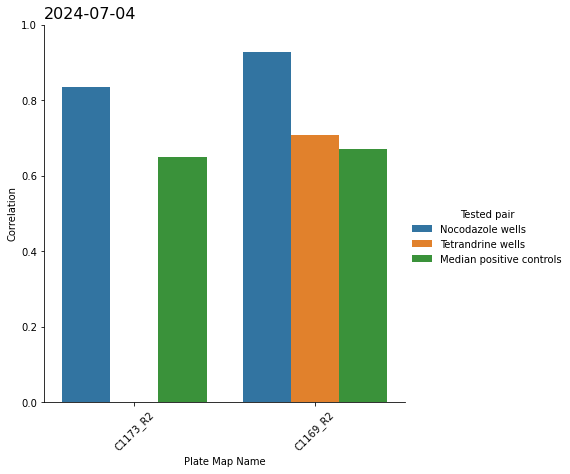

In [33]:
imaging_date_list = USC_quality_control_1["Metadata_imaging_date"].unique()
imaging_date_list.sort()

for date in imaging_date_list:
    
    USC_qc = USC_quality_control_1.loc[USC_quality_control_1["Metadata_imaging_date"] == date]
    
    USC_qc = USC_qc.replace(to_replace="Metadata_noco_corr", value="Nocodazole wells")
    USC_qc = USC_qc.replace(to_replace="Metadata_tet_corr", value="Tetrandrine wells")
    USC_qc = USC_qc.replace(to_replace="Metadata_pos_ctrl_corr", value="Median positive controls")
    
    plt.figure(figsize=(14, 7))
    
    sns.catplot(USC_qc,
                kind="bar",
                x="Metadata_plate_map_name",
                y="Correlation",
                hue="Tested pair",
                height=6,
                aspect=1)
    
    plt.title(date, loc = 'left',fontsize= 16)
    plt.xlabel('Plate Map Name')
    plt.ylabel('Correlation')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    
    plt.savefig(usc_figure_path + os.sep + date + '_' + 'USC_IntraPlate.pdf', format='pdf', bbox_inches = "tight")

<Figure size 1008x504 with 0 Axes>

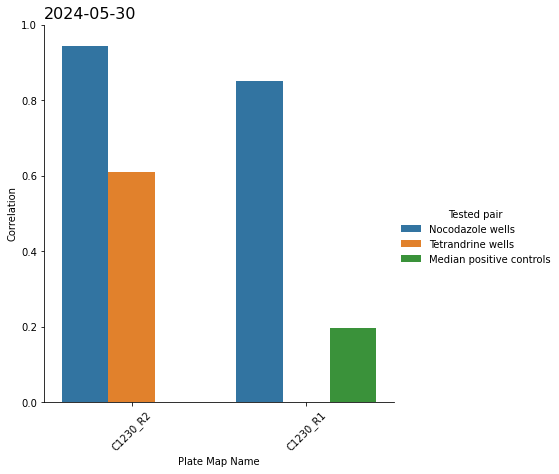

<Figure size 1008x504 with 0 Axes>

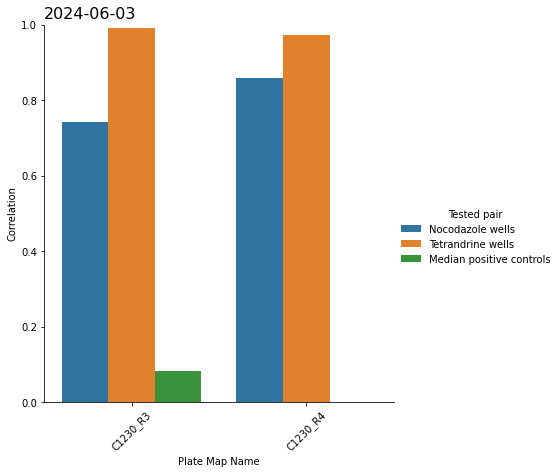

<Figure size 1008x504 with 0 Axes>

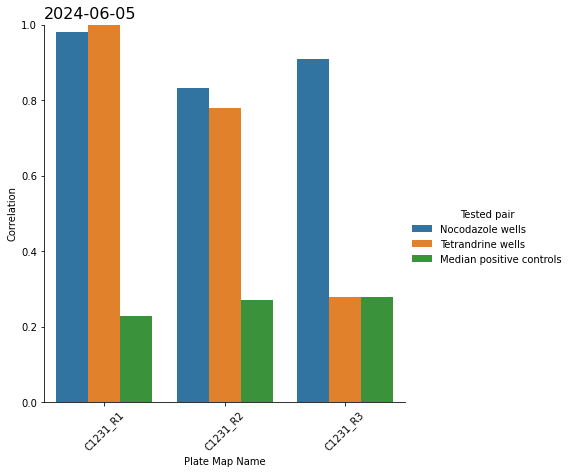

<Figure size 1008x504 with 0 Axes>

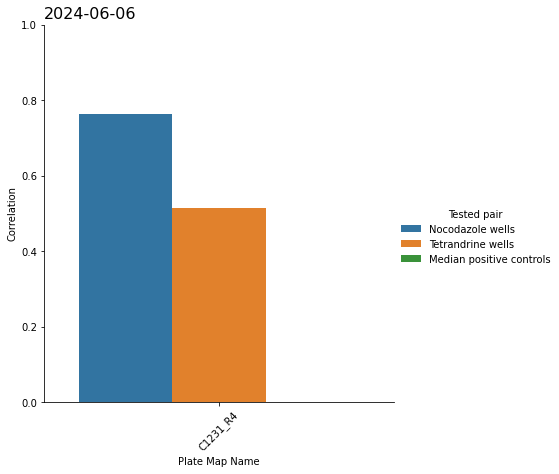

<Figure size 1008x504 with 0 Axes>

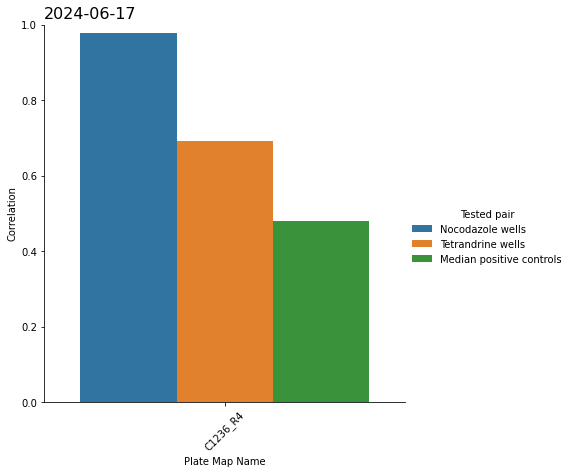

<Figure size 1008x504 with 0 Axes>

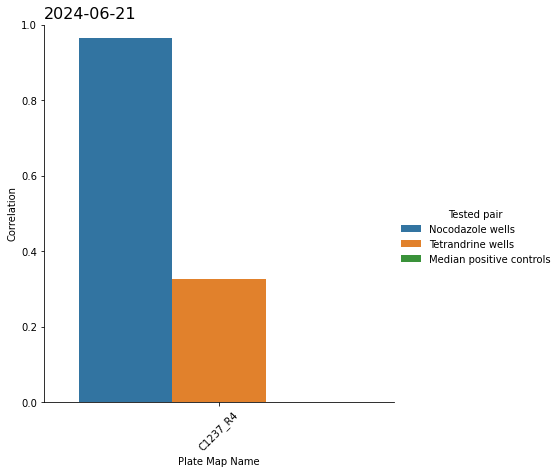

<Figure size 1008x504 with 0 Axes>

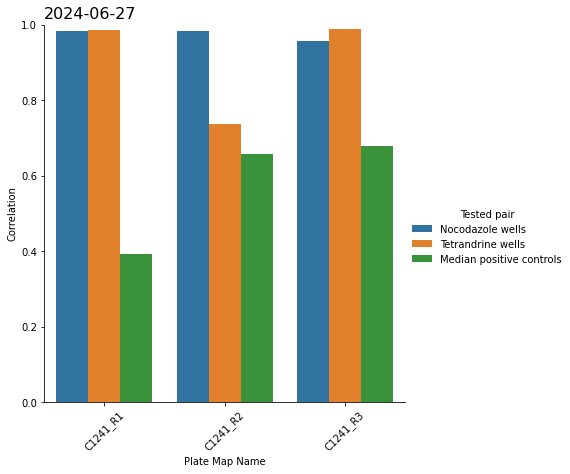

In [34]:
imaging_date_list = IMTM_quality_control_1["Metadata_imaging_date"].unique()
imaging_date_list.sort()

for date in imaging_date_list:
    
    IMTM_qc = IMTM_quality_control_1.loc[IMTM_quality_control_1["Metadata_imaging_date"] == date]
    
    IMTM_qc = IMTM_qc.replace(to_replace="Metadata_noco_corr", value="Nocodazole wells")
    IMTM_qc = IMTM_qc.replace(to_replace="Metadata_tet_corr", value="Tetrandrine wells")
    IMTM_qc = IMTM_qc.replace(to_replace="Metadata_pos_ctrl_corr", value="Median positive controls")
    
    plt.figure(figsize=(14, 7))
    
    sns.catplot(IMTM_qc,
                kind="bar",
                x="Metadata_plate_map_name",
                y="Correlation",
                hue="Tested pair",
                height=6,
                aspect=1)
    
    plt.title(date, loc = 'left',fontsize= 16)
    plt.xlabel('Plate Map Name')
    plt.ylabel('Correlation')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    
    plt.savefig(IMTM_figure_path + os.sep + date + '_' + 'IMTM_IntraPlate.pdf', format='pdf', bbox_inches = "tight")

# Other metrics

In [107]:
# Correlation distance
# perfectly correlated with correlation coefficient equal to 1 has zero distance 
# perfectly negatively correlated with correlation coefficient equal to -1 has maximal distance at 2
# inverse of correlation and only looks at the angle/similarity among patterns (sort of like normalization). 
# Correlational distance goes from 0 - 2, with 0 being PERFECT correlation, 1 being no correlation, and 2 being PERFECT ANTICORRELATION. 

In [ ]:
def get_pos_control_distance(input_dataframe, pos_ctrl_string):
    
    pos_ctrl_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == pos_ctrl_string]
    well_1_features = pos_ctrl_dataframe.iloc[0][features].values
    well_2_features = pos_ctrl_dataframe.iloc[1][features].values

    return correlation(well_1_features, well_2_features, centered = True)

In [ ]:
print(get_pos_control_distance(test_df, 'Nocodazole'))
print(get_pos_control_distance(test_df, 'Tetrandrine'))

In [115]:
# Should the DMSO be considered for comparison
# Does this make sense after normalization?
dmso_dataframe = dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'DMSO']
dmso_median_features = dmso_dataframe[features].median(axis=0)

corr_noco_dmso = correlation(nocodazole_median_features, dmso_median_features, centered = True)
corr_noco_dmso

corr_tet_dmso = correlation(tetrandrine_median_features, dmso_median_features, centered = True)
corr_tet_dmso

1.0002360393902132

# Other correlation based comparison

In [118]:
def feature_corr(df1, df2):
    
    corr = np.corrcoef(df1.astype(float), df2.astype(float))
    np.fill_diagonal(corr, np.nan)
    
    return np.nanmedian(corr)

In [119]:
feature_corr(tetrandrine_median_features, nocodazole_median_features)

0.4597470817190612

In [120]:
feature_corr(tetrandrine_well_1_features, tetrandrine_well_2_features)

0.9863459123830671

In [121]:
feature_corr(nocodazole_well_1_features, nocodazole_well_2_features)

0.9720824810732367

In [122]:
# Overall seems to yield useful values
# We can compute consensus values also then
# Test to see what happens if it fails i.e. wrong platelayout is used
# Thresholds could be: <0.3 for corr
# >0.3 for non correlation
# Oberservation from real world data will help
# Also again feature selection will make this more robust
# An alternative could be to use DMSO independent normalization
# At least for the detection of Plate layout issue


# Comparison over plates

In [33]:
# Filter for pos. control tetrandrine
# Metadata_RoughID = Tetrandrine
# Should be C24 and D24
other_tetrandrine_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'Tetrandrine']

# get features for first and second tet well
other_tetrandrine_median_features = other_tetrandrine_dataframe[features].median(axis=0)

correlation(other_tetrandrine_median_features, tetrandrine_median_features, centered = True)

NameError: name 'other_dataframe_normalized' is not defined

In [ ]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
other_nocodazole_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'Nocodazole']

# get features for first and second noco well
other_nocodazole_median_features = other_nocodazole_dataframe[features].median(axis=0)
correlation(nocodazole_median_features, other_nocodazole_median_features, centered = True)

0.0958805673067663

In [ ]:
correlation(other_tetrandrine_median_features, other_nocodazole_median_features)

0.3500988296480524

In [ ]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
other_dmso_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'DMSO']
other_dmso_median_features = dmso_dataframe[features].median(axis=0)

correlation(other_dmso_median_features, dmso_median_features, centered = True)

0.0

In [ ]:
feature_corr(other_tetrandrine_median_features, tetrandrine_median_features)

0.3148647264898983

In [ ]:
feature_corr(other_nocodazole_median_features, nocodazole_median_features)

0.904119432693222

In [ ]:
feature_corr(other_dmso_median_features, dmso_median_features)

1.0

In [ ]:
# TODO: Automate over all available plates
# TODO: Record as table with date, plate_names, source, user and other information

# Next Layer of implementation

In [ ]:
# TODO: QC visualization: per plate, per batch, per source
# TODO: Setup plate layout test to check if faulty plate layout will get detected
# TODO: Check if alternative normalization method that is independent of the layout
# TODO: Implement Correlation of pos. & neg. controls over time and track over time